In [2]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib widget

### Argument list and corresponding values of functions $x \rightarrow x^2$ and $x \rightarrow \sin(x)$
Let's try to calculate the gradient of the function with values given.

In [67]:
# argument data
lbound, rbound, num = -2, 2, 7
arg_pts = np.linspace(lbound, rbound, num=num)

In [68]:
# gradients for x**2:
pow2_pts = np.power(arg_pts, 2)

pow2_num_grad = np.gradient(pow2_pts,arg_pts)
pow2_tru_grad = 2*arg_pts

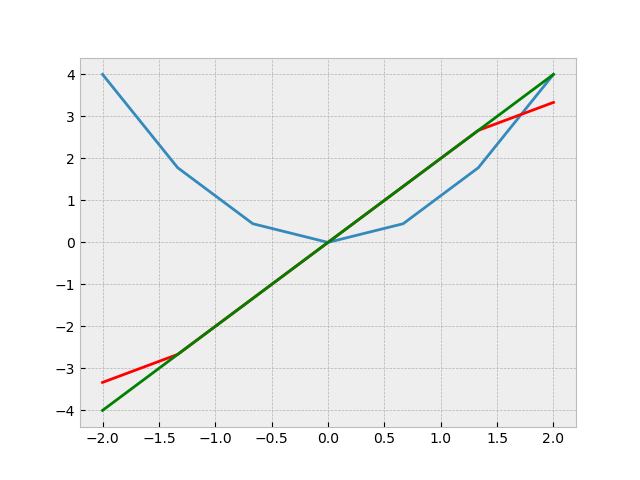

In [69]:
fig, ax = plt.subplots()
ax.plot(arg_pts,pow2_pts)
ax.plot(arg_pts,pow2_num_grad,c="r")
ax.plot(arg_pts,pow2_tru_grad,c="g")
plt.show()

In [70]:
# gradients for sin(x):
sin_pts = np.sin(arg_pts)

sin_num_grad = np.gradient(sin_pts, arg_pts)
sin_tru_grad = np.cos(arg_pts)

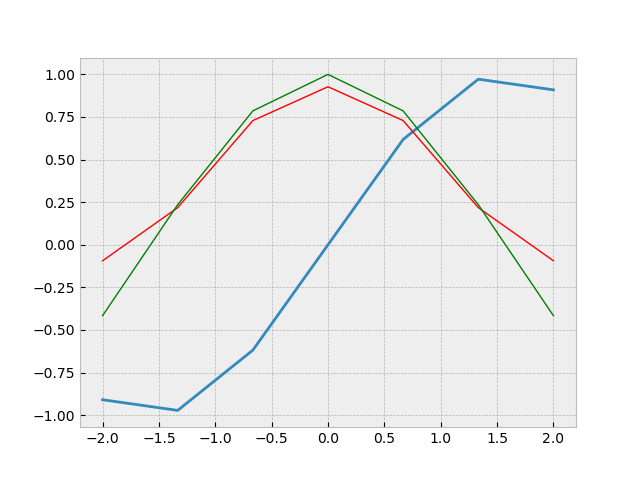

In [71]:
fig2, ax2 = plt.subplots()
ax2.plot(arg_pts, sin_pts)
ax2.plot(arg_pts,sin_num_grad,c="r",lw=1)
ax2.plot(arg_pts,sin_tru_grad,c="g",lw=1)
plt.show()

### Endpoints
Notice the difference on the edge of the definition, there is a remedy for that, namely additional argument edge_order=2 which\
causes np.gradient to use higier order aproximation and for the above functions it removes outliers at the edges.

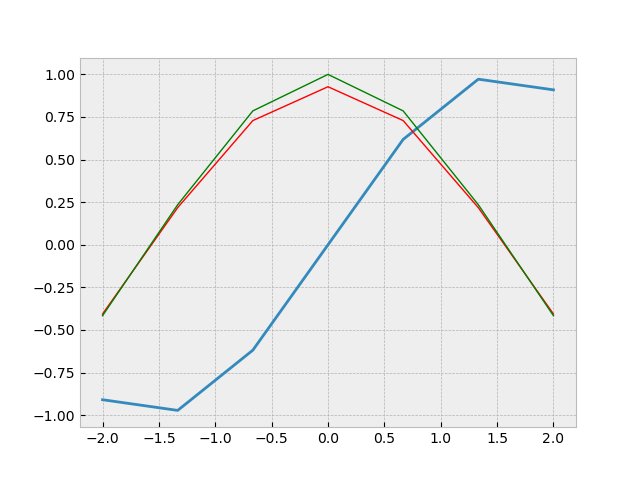

In [72]:
# compare with edge_order=2
sin_pts = np.sin(arg_pts)

sin2_num_grad = np.gradient(sin_pts, arg_pts, edge_order=2)
sin2_tru_grad = np.cos(arg_pts)

fig3, ax3 = plt.subplots()
ax3.plot(arg_pts, sin_pts)
ax3.plot(arg_pts,sin2_num_grad,c="r",lw=1)
ax3.plot(arg_pts,sin2_tru_grad,c="g",lw=1)
plt.show()

### More dimention in the argument
let's calculate the gradient of a function $$(x,y)\quad\longrightarrow\quad -\frac{x^2}{4}-\frac{y^2}{4}$$

#### Evenly spaced points

In [118]:
# argument data 2D
x_lbound, x_rbound, x_num = -3, 2, 8
y_lbound, y_rbound, y_num = -3, 2, 8
pts_dist = np.abs(x_rbound - x_lbound)/(x_num-1)

x_arg_pts = np.linspace(x_lbound, x_rbound, x_num)
x_arg_pts = np.linspace(y_lbound, y_rbound, x_num)

x_s, y_s = np.meshgrid(x_arg_pts, x_arg_pts)

In [120]:
poly1_val = - (x_s**2)/4 - (y_s**2)/4
#x_s, y_s
poly1_num_grad = np.gradient(poly1_val, pts_dist, edge_order=2)
poly1_true_grad_x, poly1_true_grad_y = - (x_s)/2, - (y_s)/2

print(f"tru grad_y =\n{poly1_true_grad_y},\n tru grad_x = \n{poly1_true_grad_x}")
print(f"num grad_y =\n{poly1_num_grad[0]},\n num_grad_x \n{poly1_num_grad[1]}")

tru grad_y =
[[ 1.5         1.5         1.5         1.5         1.5         1.5
   1.5         1.5       ]
 [ 1.14285714  1.14285714  1.14285714  1.14285714  1.14285714  1.14285714
   1.14285714  1.14285714]
 [ 0.78571429  0.78571429  0.78571429  0.78571429  0.78571429  0.78571429
   0.78571429  0.78571429]
 [ 0.42857143  0.42857143  0.42857143  0.42857143  0.42857143  0.42857143
   0.42857143  0.42857143]
 [ 0.07142857  0.07142857  0.07142857  0.07142857  0.07142857  0.07142857
   0.07142857  0.07142857]
 [-0.28571429 -0.28571429 -0.28571429 -0.28571429 -0.28571429 -0.28571429
  -0.28571429 -0.28571429]
 [-0.64285714 -0.64285714 -0.64285714 -0.64285714 -0.64285714 -0.64285714
  -0.64285714 -0.64285714]
 [-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.        ]],
 tru grad_x = 
[[ 1.5         1.14285714  0.78571429  0.42857143  0.07142857 -0.28571429
  -0.64285714 -1.        ]
 [ 1.5         1.14285714  0.78571429  0.42857143  0.07142857 -0.28571429
  